In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load encoded dataset
df = pd.read_csv('/content/sample_data/hEART_dISEASSE.csv')


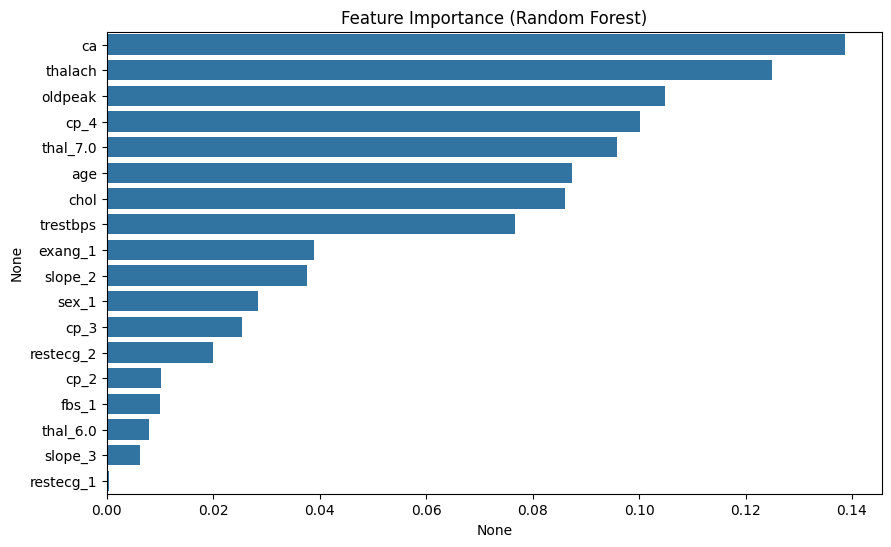

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("num", axis=1)
y = (df['num'] > 0).astype(int)  # 0 = No disease, 1 = Any disease
# Fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importance plot
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted, y=importances_sorted.index)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# RFE with Logistic Regression
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("RFE Selected Features:")
print(selected_features)


RFE Selected Features:
Index(['oldpeak', 'ca', 'sex_1', 'cp_2', 'cp_3', 'cp_4', 'restecg_2',
       'exang_1', 'slope_2', 'thal_7.0'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X_chi = X.copy()

# Convert booleans to integers
bool_cols = X_chi.select_dtypes(include='bool').columns
X_chi[bool_cols] = X_chi[bool_cols].astype(int)

# Ensure all values are non-negative
X_chi = X_chi - X_chi.min()

# Apply Chi-Square
chi_selector = SelectKBest(score_func=chi2, k=10)
chi_selector.fit(X_chi, y)

# Get selected features
selected_features2 = X_chi.columns[chi_selector.get_support()]
print("Chi-Square Selected Features:")
print(selected_features2)


Chi-Square Selected Features:
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_3', 'cp_4',
       'exang_1', 'thal_7.0'],
      dtype='object')


In [ ]:
selected_set = set(selected_features) & set(selected_features2) & set(importances_sorted.head(10).index)
print("Final Selected Features:", selected_set)


Final Selected Features: {'chol', 'thal_7.0', 'thalach', 'ca', 'exang_1', 'age', 'trestbps', 'cp_4', 'oldpeak'}


In [ ]:
X_selected = X[list(selected_set)].copy()
X_selected["target"] = y
X_selected.to_csv("reduced_selected_features.csv", index=False)
